In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as ma
from numpy.linalg import inv
from ipywidgets import *
%matplotlib inline

# 0. Los datos

In [2]:
columns = ['ell', 'Cl', 'se', 'measerr', 'cosmic']
df = pd.read_csv("wmap.dat.txt", sep="\s+", usecols=columns)
df.head()

,ell,Cl,se,measerr,cosmic
0,2,123.382,762.6369,3.3813,759.2556
1,3,611.775,608.1737,4.0262,604.1475
2,4,756.616,503.9580,4.3394,499.6186
3,5,1256.700,432.1765,4.5485,427.6281
4,6,696.479,380.1810,4.7410,375.4400


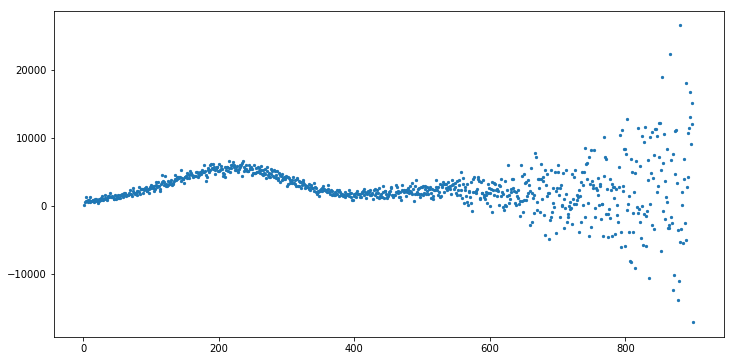

In [3]:
x = X = list(df['ell'])
y = Y = list(df['Cl'])
n = len(X)
plt.figure(figsize=(12,6))
plt.scatter(X,Y,s=5)

# 1. Escoger un método de de suavizamiento

### 1.1 Regresión con Kernel

In [8]:
K = lambda x: 1/(ma.sqrt(2*ma.pi))*ma.exp(-(x**2)/2)
def rn(x,h):
    n = len(X)
    l = [K((x-X[i])/h) for i in range(n)]
    return sum(l[i]*Y[i] for i in range(n))/sum(l)

In [9]:
@interact(h=widgets.FloatSlider(
    value=10,
    min=0.1,
    max=20,
    step=1))
def ploting(h):
    plt.figure(figsize=(12,6))
    plt.scatter(X,Y,s=5)
    plt.plot(np.arange(0.1,900,5),[rn(x,h) for x in np.arange(0.1,900,5)],color='red')

interactive(children=(FloatSlider(value=10.0, description='h', max=20.0, min=0.1, step=1.0), Output()), _dom_c…

# 2. Escoger $h$ o $\lambda$ usando validación cruzada

h optimo = 18


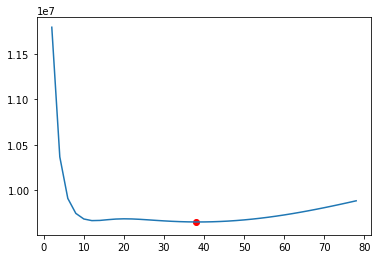

In [56]:
def Risk(h):
    L = [K(0)/sum(K((X[j]-X[i])/h) for j in range(n)) for i in range(n)]
    return ((1/n)*sum(((rn(X[i],h)- Y[i])/(1-L[i]))**2 for i in range(n)))

rango = np.arange(2,80,2)
Ry = [Risk(x) for x in rango]
plt.plot(rango,Ry)
hop = np.argmin(Ry)
plt.scatter(rango[hop],Ry[hop],color='red')
print('h optimo = {}'.format(hop))

# 3. Estimar $\hat{\sigma}^{2}(x)$

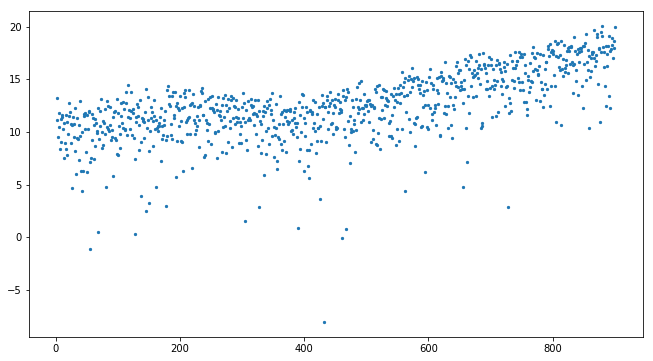

In [49]:
Z = [ma.log((rn(X[i],hop)- Y[i])**2) for i in range(n)]
plt.figure(figsize=(11,6))
plt.scatter(X,Z,s=5)

In [50]:
K = lambda x: 1/(ma.sqrt(2*ma.pi))*ma.exp(-(x**2)/2)
def qn(x,h):
    n = len(X)
    l = [K((x-X[i])/h) for i in range(n)]
    return sum(l[i]*Z[i] for i in range(n))/sum(l)

In [57]:
@interact(h=widgets.FloatSlider(
    value=10,
    min=0.1,
    max=20,
    step=1))
def ploting(h):
    plt.figure(figsize=(11,6))
    plt.scatter(X,Z,s=5)
    plt.plot(np.arange(0.1,900,5),[qn(x,h) for x in np.arange(0.1,900,5)],color='red')

interactive(children=(FloatSlider(value=10.0, description='h', max=20.0, min=0.1, step=1.0), Output()), _dom_c…

h optimo = 22


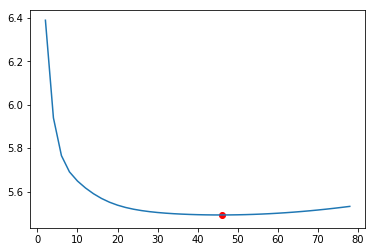

In [54]:
def Risk(h):
    L = [K(0)/sum(K((X[j]-X[i])/h) for j in range(n)) for i in range(n)]
    return ((1/n)*sum(((qn(X[i],h)- Z[i])/(1-L[i]))**2 for i in range(n)))

rango = np.arange(2,80,2)
Ry = [Risk(x) for x in rango]
plt.plot(rango,Ry)
hop = np.argmin(Ry)
plt.scatter(rango[hop],Ry[hop],color='red')
print('h optimo = {}'.format(hop))

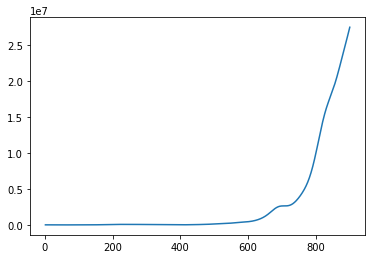

In [55]:
Var = [ma.exp(qn(y,hop)) for y in X]
plt.plot(X,Var)

# 4. Encontrar una banda de confianza $1-\alpha$ 
## $$ \hat{r}_n(x)\pm c\ \hat{\sigma}^{2}(x)||l(x)||$$

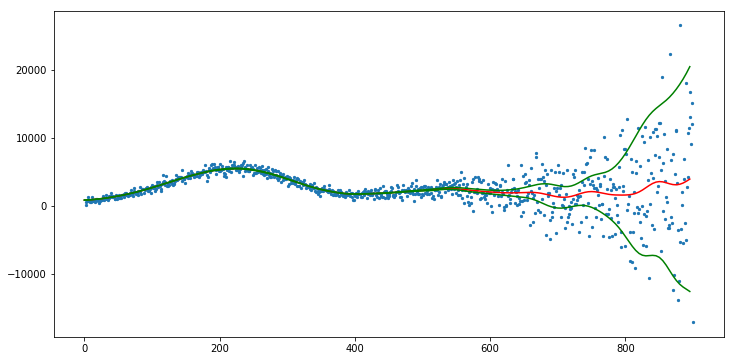

In [69]:
lnorm = lambda x : K(x-X[i])
sup = [rn(y,hop) + 0.0006*ma.exp(qn(y,hop)) for y in np.arange(0.1,900,5)]
inf = [rn(y,hop) - 0.0006*ma.exp(qn(y,hop)) for y in np.arange(0.1,900,5)]
plt.figure(figsize=(12,6))
plt.scatter(X,Y,s=5)
plt.plot(np.arange(0.1,900,5),[rn(x,hop) for x in np.arange(0.1,900,5)],color='red')
plt.plot(np.arange(0.1,900,5),sup,color='green')
plt.plot(np.arange(0.1,900,5),inf,color='green')